In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/Germany/input_data.csv')
df.head()

,time,rr,tg,tn,tx,pp,hu,fg,qq,et
0,1990-01-01,0.0,-4.47,-5.31,-3.86,1022.4,92.15000,1.03,30.0,0.219842
1,1990-01-02,0.0,-2.74,-5.45,-0.43,1023.5,91.37500,0.99,33.0,0.261125
2,1990-01-03,0.0,-1.05,-3.52,-0.29,1024.4,86.18000,2.09,15.0,0.127449
3,1990-01-04,0.0,-3.00,-4.11,-0.79,1027.9,88.58500,2.22,30.0,0.234045
4,1990-01-05,1.4,-1.46,-3.50,-0.87,1027.8,92.46001,1.56,14.0,0.116699


In [3]:
df['time'].str.split('-')

0        [1990, 01, 01]
1        [1990, 01, 02]
2        [1990, 01, 03]
3        [1990, 01, 04]
4        [1990, 01, 05]
              ...      
11683    [2021, 12, 27]
11684    [2021, 12, 28]
11685    [2021, 12, 29]
11686    [2021, 12, 30]
11687    [2021, 12, 31]
Name: time, Length: 11688, dtype: object

In [4]:
df['time'] = df['time'].astype('datetime64')
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day

In [5]:
df.head()

,time,rr,tg,tn,tx,pp,hu,fg,qq,et,year,month,day
0,1990-01-01,0.0,-4.47,-5.31,-3.86,1022.4,92.15000,1.03,30.0,0.219842,1990,1,1
1,1990-01-02,0.0,-2.74,-5.45,-0.43,1023.5,91.37500,0.99,33.0,0.261125,1990,1,2
2,1990-01-03,0.0,-1.05,-3.52,-0.29,1024.4,86.18000,2.09,15.0,0.127449,1990,1,3
3,1990-01-04,0.0,-3.00,-4.11,-0.79,1027.9,88.58500,2.22,30.0,0.234045,1990,1,4
4,1990-01-05,1.4,-1.46,-3.50,-0.87,1027.8,92.46001,1.56,14.0,0.116699,1990,1,5


In [6]:
target = pd.read_csv('data/Germany/heads.csv')
target['Date'] = target['Date'].astype('datetime64')
target['year'] = pd.DatetimeIndex(target['Date']).year
target['month'] = pd.DatetimeIndex(target['Date']).month
target['day'] = pd.DatetimeIndex(target['Date']).day
target.head()

,Date,head,year,month,day
0,2002-05-01,374.76,2002,5,1
1,2002-05-02,374.75,2002,5,2
2,2002-05-03,374.74,2002,5,3
3,2002-05-04,374.72,2002,5,4
4,2002-05-05,374.71,2002,5,5


In [7]:
target['Date'].describe()

/var/folders/3h/rwm3946s6m393kd1m_w94xl00000gn/T/ipykernel_6014/2795675805.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  target['Date'].describe()


count                    5359
unique                   5359
top       2002-05-01 00:00:00
freq                        1
first     2002-05-01 00:00:00
last      2016-12-31 00:00:00
Name: Date, dtype: object

In [8]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5359 non-null   datetime64[ns]
 1   head    5359 non-null   float64       
 2   year    5359 non-null   int64         
 3   month   5359 non-null   int64         
 4   day     5359 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 209.5 KB


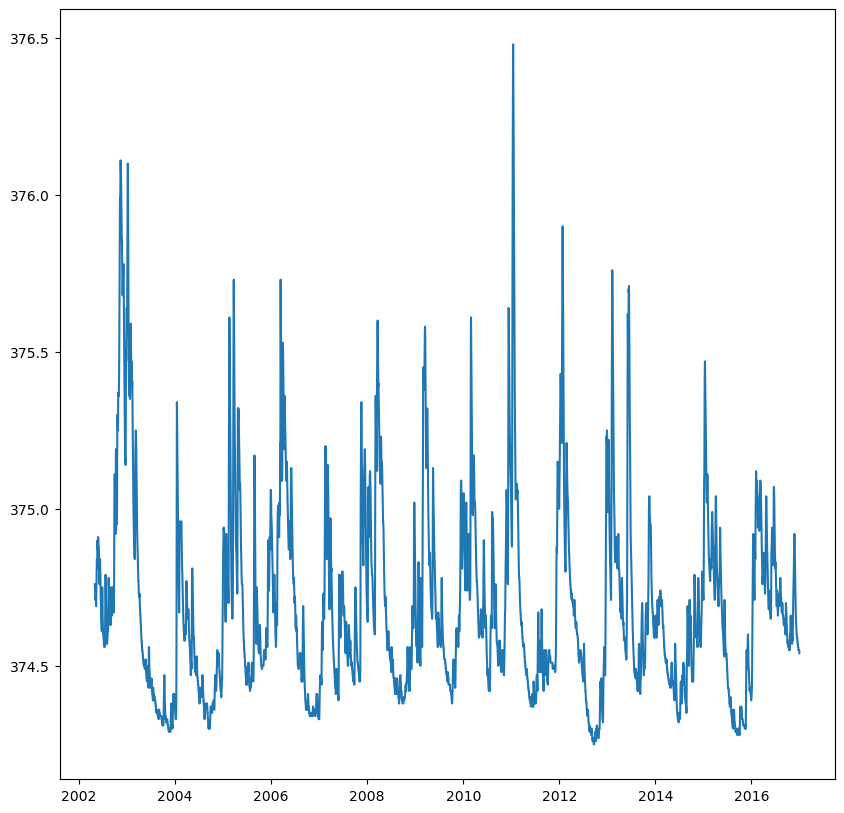

In [10]:
plt.figure(figsize=(10,10))
plt.plot(target['Date'],target['head'])
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    11688 non-null  datetime64[ns]
 1   rr      11688 non-null  float64       
 2   tg      11688 non-null  float64       
 3   tn      11688 non-null  float64       
 4   tx      11688 non-null  float64       
 5   pp      11688 non-null  float64       
 6   hu      11688 non-null  float64       
 7   fg      11688 non-null  float64       
 8   qq      11688 non-null  float64       
 9   et      11688 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 913.2 KB


In [6]:
df.describe()

,rr,tg,tn,tx,pp,hu,fg,qq,et
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,1.894918,8.710076,4.063214,13.532966,1017.359756,79.907466,2.522858,132.551335,1.755455
std,4.173772,7.675261,6.741084,9.209754,8.298258,11.301445,1.098692,92.311618,1.445730
min,0.000000,-16.449999,-22.310000,-10.110000,979.300000,29.290000,0.480000,12.000000,0.092640
25%,0.000000,2.620000,-0.730000,5.980000,1012.300000,72.172500,1.760000,48.000000,0.460604
50%,0.000000,8.780000,4.085000,13.665000,1017.100040,81.810002,2.300000,113.000000,1.314659
75%,2.000000,14.900000,9.450000,20.850000,1022.600040,89.520004,3.050000,208.000000,2.846947
max,50.800000,27.960000,21.449999,36.590000,1045.800000,95.200005,9.360000,353.000000,5.733707


In [9]:
# extract dataset for the time span available in target variable
df = df[(df['time'] >= '2002-05-01') & (df['time'] <= '2016-12-31')]


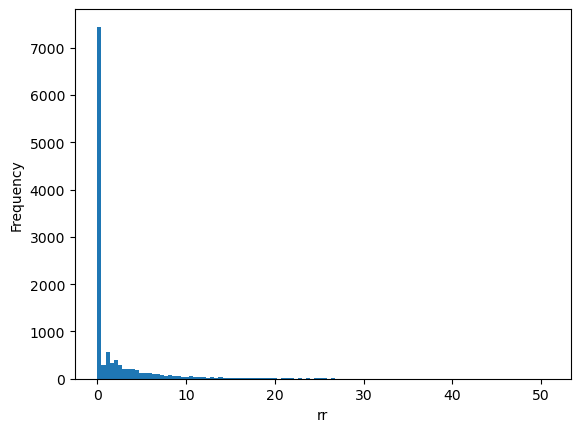

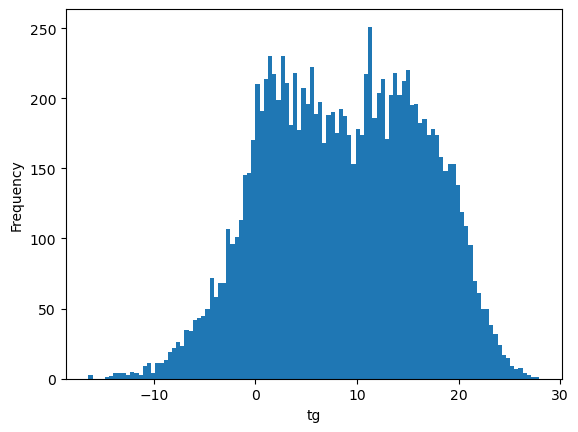

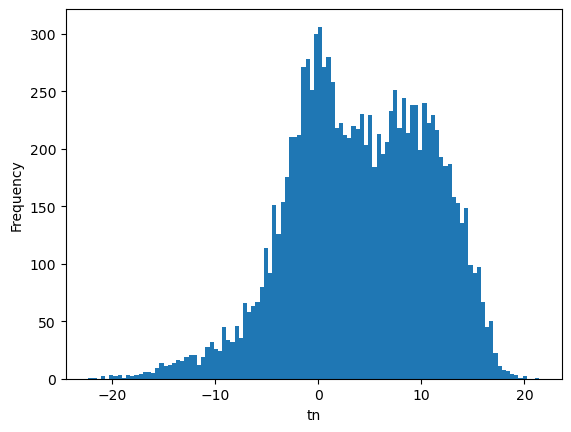

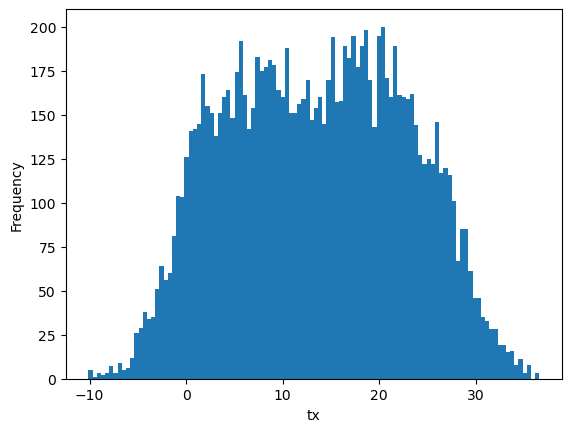

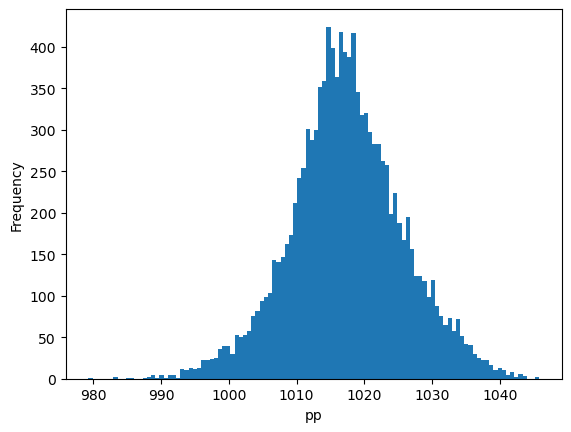

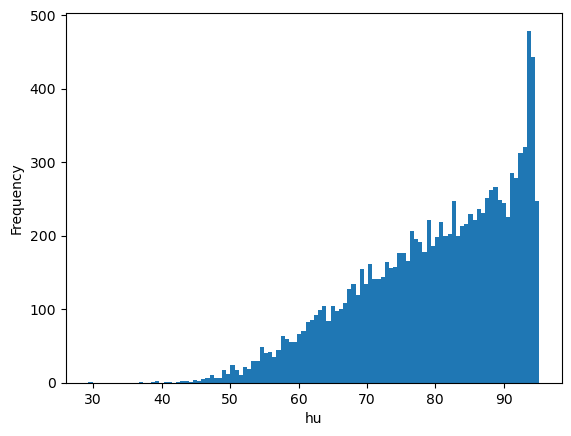

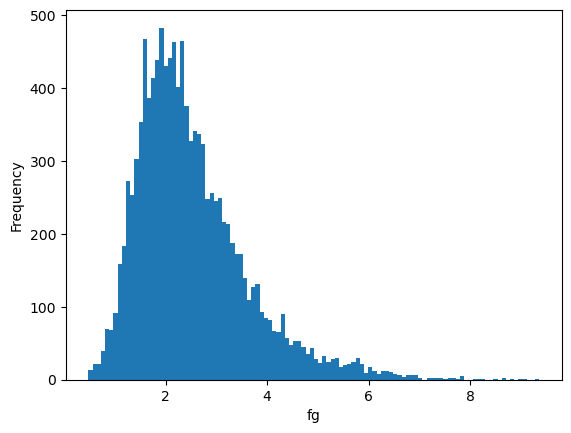

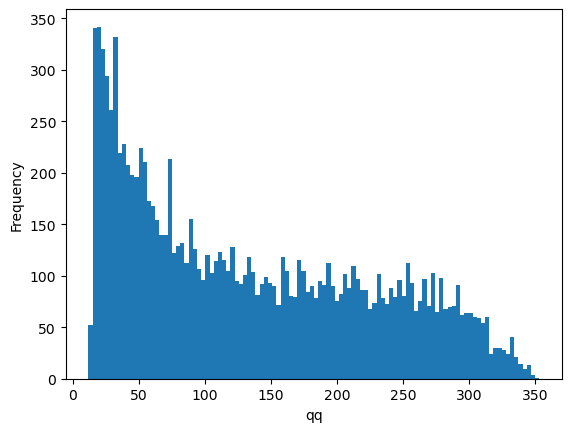

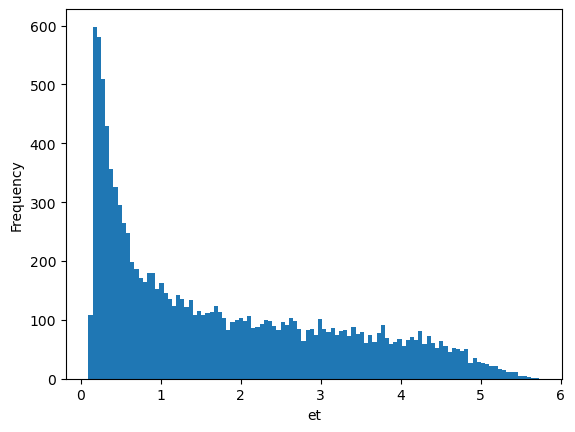

In [36]:

for col in df.columns[1:10]:
    df[col].plot.hist(bins=int(np.sqrt(df.shape[0])))
    plt.xlabel(col)
    plt.show()

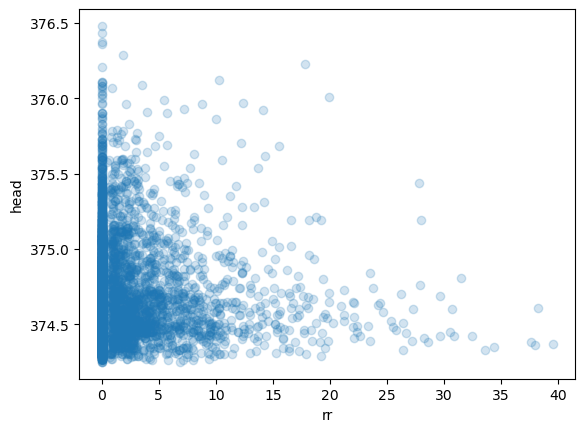

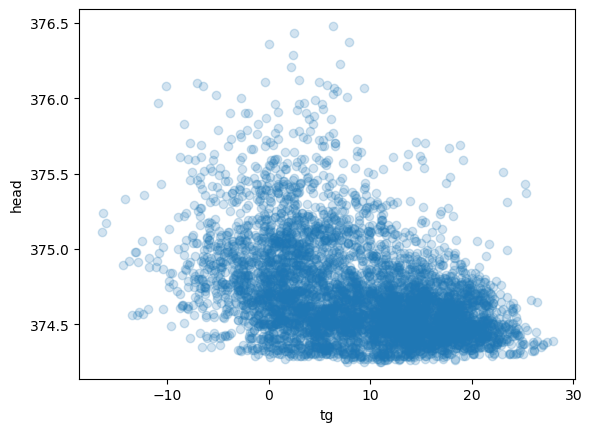

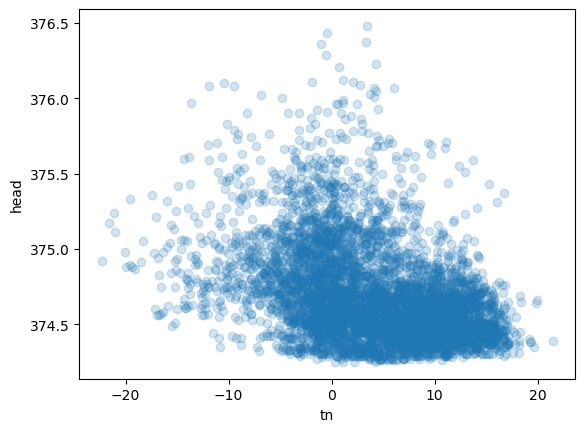

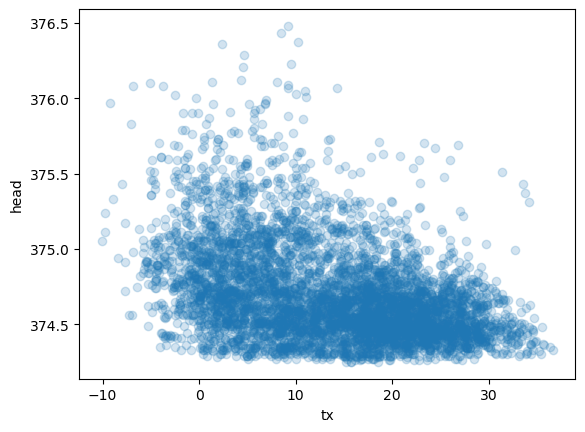

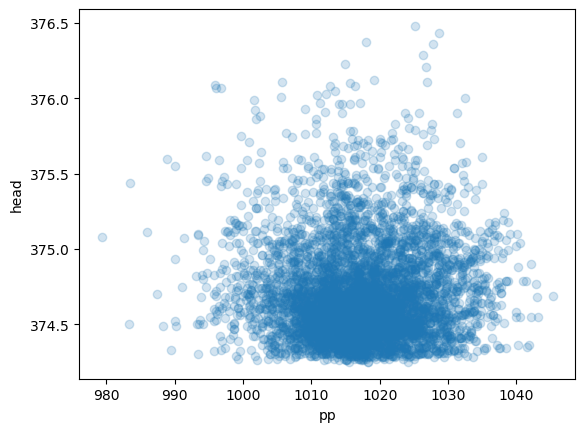

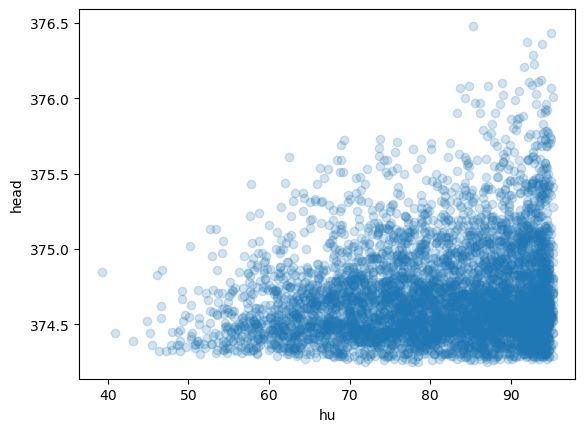

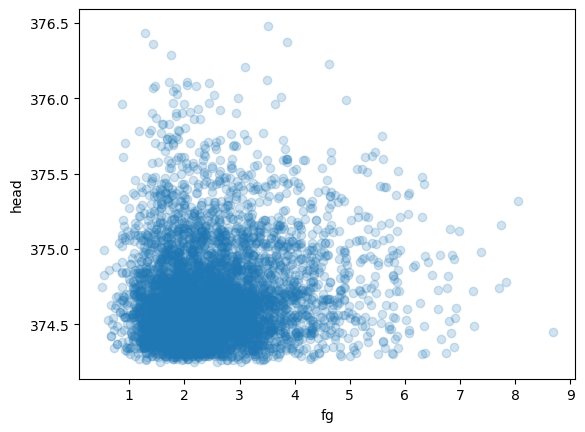

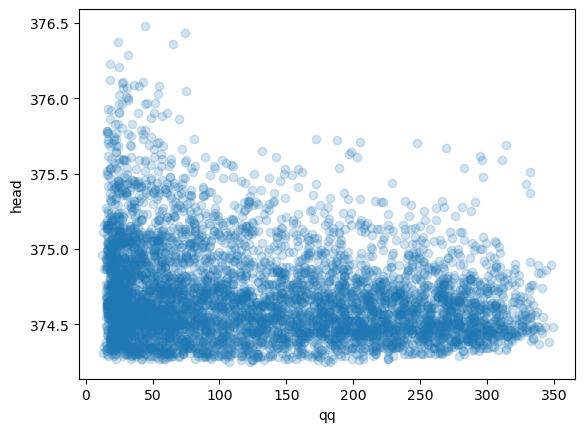

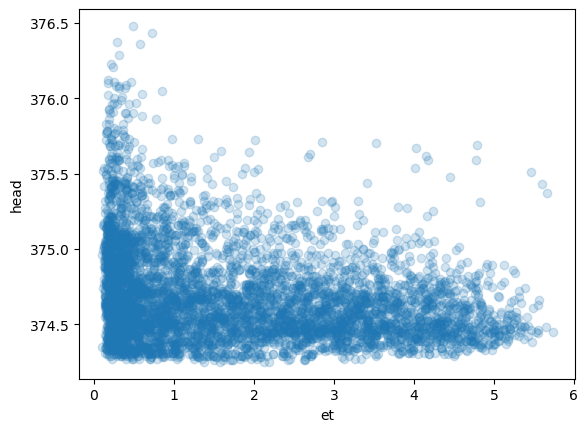

In [10]:
# scatter plot of each feature variable with target variable
for col in df.columns[1:10]:
    plt.scatter(df[col], target['head'], alpha = 0.2)
    plt.xlabel(col)
    plt.ylabel('head')
    plt.show()

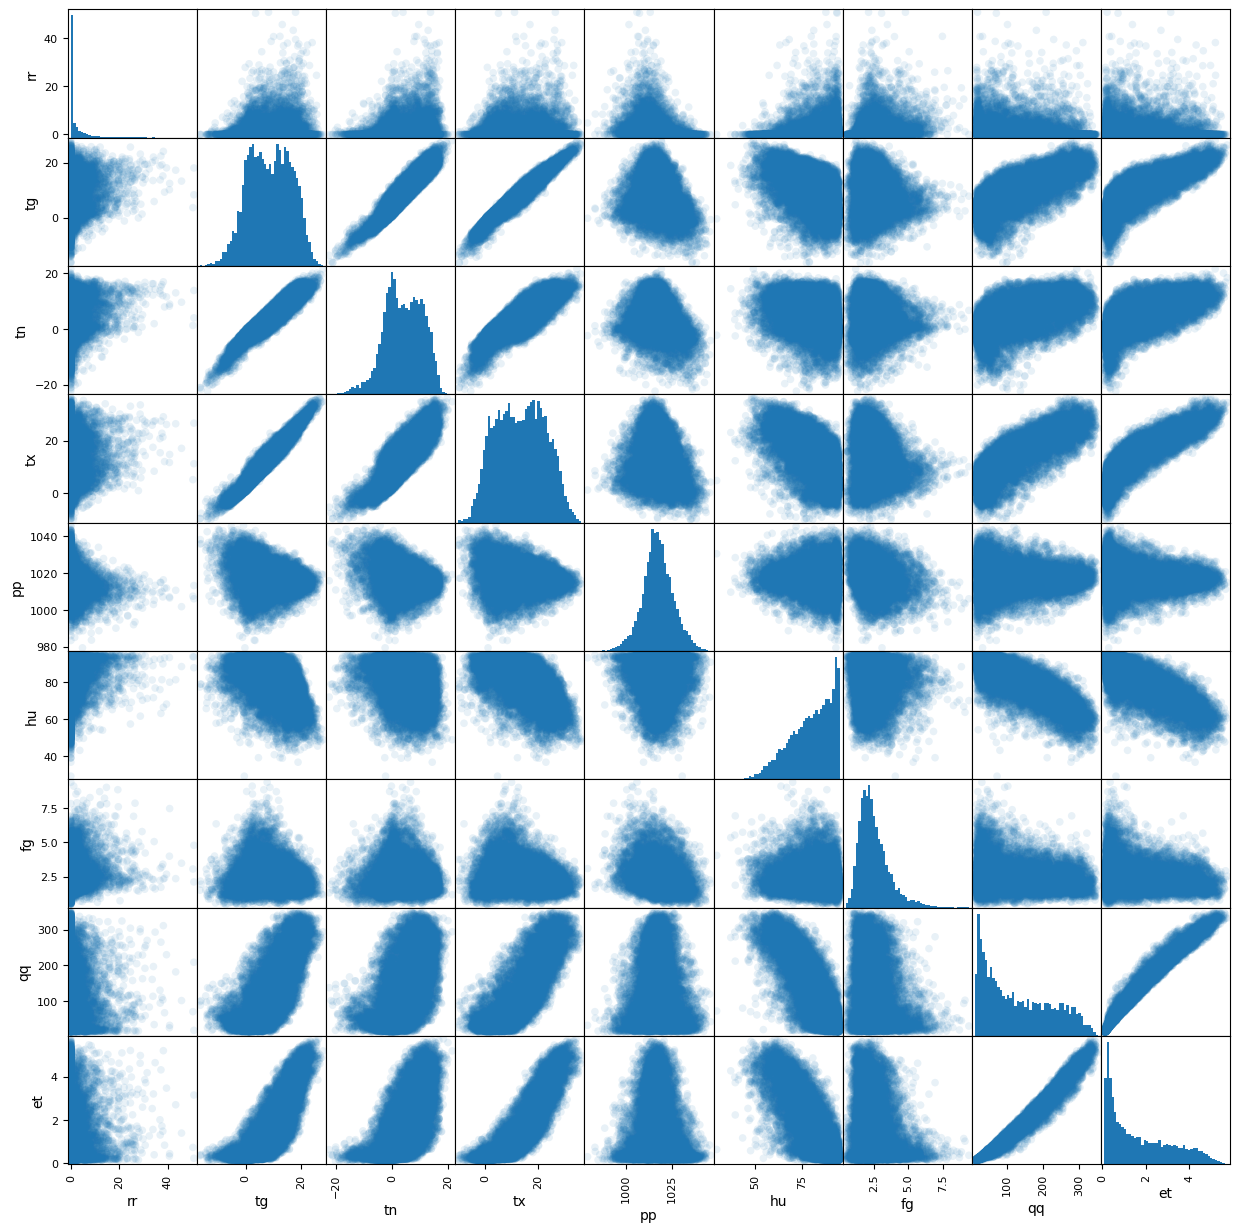

In [12]:

pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(15, 15), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [19]:
corr_matrix = df.select_dtypes(float).corr()

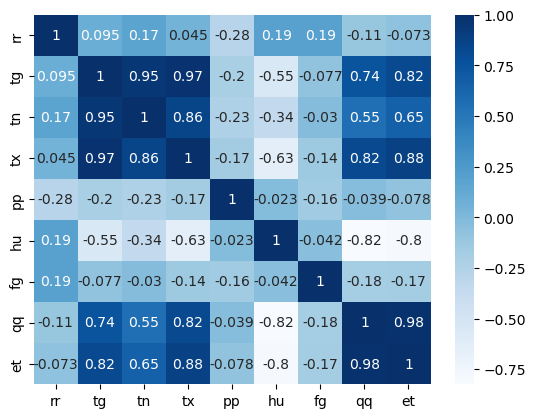

In [20]:
corr_map = sns.heatmap(corr_matrix, cmap='Blues', annot=True)

In [10]:
# deleting highly correlated columns for now:
# how else can i deal with this that doesn't involve deleting features??

X = df.drop(columns=['tn','tx','et'])
X.set_index('time', inplace=True)
X.head()

,rr,tg,pp,hu,fg,qq,year,month,day
time,,,,,,,,,
2002-05-01,0.0,12.990000,1008.9,70.520004,2.88,205.0,2002,5,1
2002-05-02,0.0,11.759999,1008.0,79.690000,2.70,154.0,2002,5,2
2002-05-03,0.0,11.880000,1007.7,89.940000,2.49,102.0,2002,5,3
2002-05-04,6.3,8.670000,1009.5,94.128580,2.40,85.0,2002,5,4
2002-05-05,7.0,7.870000,1015.2,77.665000,1.87,137.0,2002,5,5


In [11]:
# split data into train and validation
X_train = X[X['year']<2014]
X_val = X[X['year']>= 2014]

y_train = target[target['Date'] < '2014-01-01']['head']
y_val = target[target['Date'] >= '2014-01-01']['head']

In [51]:
# very basic regression model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_val)

In [52]:
reg.coef_

array([-0.00116784, -0.01586536, -0.00223178,  0.00456636,  0.01943991,
        0.00045975, -0.0059715 , -0.03086702,  0.00015624])

In [53]:
MSE = mean_squared_error(y_val, y_pred)
MSE

0.03590353837916959

In [13]:
X_train.columns

Index(['rr', 'tg', 'pp', 'hu', 'fg', 'qq', 'year', 'month', 'day'], dtype='object')

In [18]:
# transform columns using standard scaler
std_ftrs = ['rr','tg','pp','hu','fg','qq']
std = StandardScaler()

X_train_std = std.fit_transform(X_train[std_ftrs])
X_val_std = std.transform(X_val[std_ftrs])


In [26]:
# transform month into categorical variable
ohe_ftrs = ['month']
ohe = OneHotEncoder(sparse=False)

X_train_ohe = ohe.fit_transform(X_train[ohe_ftrs])
X_val_ohe = ohe.transform(X_val[ohe_ftrs])

In [43]:
X_train_pre = np.concatenate((X_train_std,X_train_ohe,np.array(X_train['year'])[np.newaxis].reshape(len(X_train['year']),1)), axis=1)
X_val_pre = np.concatenate((X_val_std,X_val_ohe,np.array(X_val['year'])[np.newaxis].reshape(len(X_val['year']),1)), axis=1)
print(X_train_pre.shape, X_val_pre.shape)

(4263, 19) (1096, 19)


In [46]:
# regression after preprocessing
reg = LinearRegression().fit(X_train_pre, y_train)
y_pred = reg.predict(X_val_pre)

In [50]:
# MSE is larger??
MSE = mean_squared_error(y_val, y_pred)
MSE

0.03996452984534492